# Regression - Predicting continuous values 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Create a regression dataset

In [2]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=5000, n_features=30, n_informative=25, noise=10, random_state=42)

In [3]:
X

array([[-1.05245683, -0.94496269, -1.79989659, ..., -1.83442393,
        -0.07956011,  1.20745263],
       [-0.84747383,  0.31840811,  0.24796167, ..., -0.2390554 ,
        -0.69763862,  1.31984005],
       [-0.94602775,  0.2383774 , -1.6176638 , ..., -0.09142036,
        -0.74652074, -2.21823553],
       ...,
       [-0.22097737,  1.14453288, -0.39354952, ..., -0.90184457,
        -0.07424546, -0.2463316 ],
       [-0.95614616,  0.03256098, -1.12885675, ..., -0.00963513,
        -1.43734832,  0.63541106],
       [ 1.51114116, -0.00270833, -1.26097476, ..., -0.15650465,
         0.50981791,  1.19398227]])

In [4]:
X.shape

(5000, 30)

In [5]:
Y

array([-232.93639282, -144.45063306,  -30.67109763, ...,  143.2968639 ,
       -248.32988778,  -19.83229819])

### Save X and Y in dataframe

In [6]:
cols = [f'x{i+1}' for i in range(30)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30']

In [7]:
import pandas as pd
X = pd.DataFrame(X, columns=cols)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.052457,-0.944963,-1.799897,-0.034799,-1.482409,1.613543,-0.748163,-0.645310,1.063117,-1.335465,...,-0.398323,0.326932,2.042239,-0.301699,-1.361063,1.454857,-0.066823,-1.834424,-0.079560,1.207453
1,-0.847474,0.318408,0.247962,0.176165,0.550274,-0.695864,0.599538,-0.050914,1.363157,-1.201647,...,-1.368967,-0.403174,0.125837,-1.231097,-0.042579,-0.293594,-0.505876,-0.239055,-0.697639,1.319840
2,-0.946028,0.238377,-1.617664,-2.253756,-1.057629,-0.011553,1.400647,0.990803,-0.262228,-0.396235,...,-0.400736,0.007432,0.219753,2.205187,0.746020,-0.175596,-1.132978,-0.091420,-0.746521,-2.218236
3,-0.365222,0.004347,1.459301,1.650519,-3.114990,0.718841,1.669763,0.594568,0.350614,-0.528732,...,0.587610,0.050495,0.692244,0.492412,-0.118160,0.151945,-0.299890,1.009559,-0.779756,1.105541
4,-0.937119,0.038862,0.267291,-2.321520,-0.519995,1.281711,-0.447109,1.847404,-0.179080,0.073799,...,-0.985717,0.734585,-0.870311,0.316585,0.373045,-0.594102,-1.388615,1.262913,-0.668793,-0.049186


In [8]:
Y = pd.DataFrame(Y, columns=['Y'])

In [9]:
Y

,Y
0,-232.936393
1,-144.450633
2,-30.671098
3,165.764197
4,-252.068764
...,...
4995,337.924300
4996,587.266360
4997,143.296864
4998,-248.329888


### Create a preprocessing Pipeline for X

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-1.00877542, -0.96849615, -1.8356222 , ..., -1.84743596,
        -0.06441693,  1.19633814],
       [-0.80656544,  0.30321775,  0.22782616, ..., -0.25077076,
        -0.67948802,  1.30863615],
       [-0.90378611,  0.22265853, -1.6520021 , ..., -0.10301574,
        -0.72813229, -2.22662492],
       ...,
       [-0.1885443 ,  1.13479811, -0.41856878, ..., -0.91409862,
        -0.05912814, -0.25628963],
       [-0.91376764,  0.01548293, -1.15947382, ..., -0.02116403,
        -1.41559849,  0.62475162],
       [ 1.52014196, -0.02001929, -1.29259762, ..., -0.16815292,
         0.52209333,  1.18287849]])

In [13]:
cols = num_pipe.get_feature_names_out()

In [14]:
cols

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30'], dtype=object)

In [15]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.008775,-0.968496,-1.835622,-0.032196,-1.485420,1.614947,-0.747164,-0.627734,1.038359,-1.340893,...,-0.418507,0.322752,2.071710,-0.324901,-1.342910,1.406812,-0.052268,-1.847436,-0.064417,1.196338
1,-0.806565,0.303218,0.227826,0.179320,0.577043,-0.684461,0.585446,-0.053781,1.334905,-1.205877,...,-1.393646,-0.402106,0.132047,-1.271369,-0.027103,-0.319448,-0.496045,-0.250771,-0.679488,1.308636
2,-0.903786,0.222659,-1.652002,-2.256956,-1.054417,-0.003112,1.377584,0.952108,-0.271556,-0.393252,...,-0.420931,0.005548,0.227103,2.228029,0.759895,-0.202948,-1.129894,-0.103016,-0.728132,-2.226625
3,-0.330838,-0.012918,1.448387,1.657530,-3.141920,0.724120,1.643688,0.569500,0.334151,-0.526935,...,0.571991,0.048302,0.705328,0.483796,-0.102530,0.120436,-0.287843,0.998859,-0.761205,1.094508
4,-0.894998,0.021825,0.247303,-2.324897,-0.508906,1.284552,-0.449481,1.779248,-0.189376,0.080993,...,-1.008621,0.727476,-0.876193,0.304739,0.387677,-0.616143,-1.388281,1.252419,-0.650783,-0.059300


### Train Test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [17]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
4227,0.274306,-2.243030,0.307393,2.279325,-0.849919,-0.499417,0.063387,0.322236,-0.279113,-1.485297,...,-0.435550,0.016456,-0.478773,0.826978,0.348374,0.203044,-0.974020,1.133163,0.644459,1.026561
4676,-0.110889,-2.308274,-0.306657,-2.797217,0.744218,-1.215240,0.092720,-0.881949,0.099739,-0.153516,...,0.684150,-0.050237,0.659385,0.950390,-2.264741,-0.934321,-0.207092,-1.429908,0.477449,-0.143864
800,-0.534724,0.341340,-0.318392,1.233363,1.778518,0.298750,0.083038,0.104657,0.121582,1.150535,...,2.105502,0.100787,0.150310,0.796843,0.088543,1.044029,-0.691462,0.027791,-0.467562,1.088671
3671,-0.366200,1.081039,-0.920495,-1.060692,-0.616689,0.923926,1.178280,-2.049797,-0.133985,-1.437462,...,0.375930,0.799287,-1.524107,-0.213573,1.841831,-0.235666,-1.623648,0.003545,2.453793,-0.826658
4193,-0.834782,1.471498,-1.414701,-0.704299,2.131088,-0.208189,0.823199,0.547557,0.462746,-1.556602,...,-1.605144,0.394171,0.414800,0.015313,-1.559552,0.776827,-1.919909,1.235952,-1.425568,0.749621


In [18]:
ytrain.head()

,Y
4227,421.295025
4676,-469.452726
800,42.172815
3671,114.083914
4193,-217.535707


In [19]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
1501,0.523841,0.380018,1.397668,1.832757,-0.050539,-0.370155,-0.415394,-1.015830,-0.468665,1.118904,...,-1.087076,0.280815,1.197157,-0.330182,-0.384110,0.456972,0.408793,0.229924,0.065080,-0.460325
2586,0.427962,0.736934,-1.337873,-0.286005,1.022151,-1.001614,1.835519,-1.545811,0.770498,0.293343,...,-0.316910,0.912012,-0.200186,0.895191,-1.340780,-0.398981,-1.299802,-1.160043,0.238474,-0.353788
2653,-1.237790,0.022987,0.591727,0.153331,-1.080162,0.695919,-0.224618,-1.372016,-0.465166,2.577988,...,0.420588,-0.927035,-1.260994,-0.041976,0.559996,-0.025339,0.715960,-2.211627,-0.158048,0.088334
1055,1.163302,0.829281,-0.052936,0.871349,0.526932,-0.469475,0.681055,2.525169,0.805937,-0.311984,...,-0.363881,-1.270352,-0.114835,-0.838927,0.522602,0.531030,-0.113249,-0.130759,-1.530358,0.355058
705,-0.916867,-0.873641,0.964425,-3.404521,-0.352093,0.141089,0.059867,-0.401822,0.274345,1.985234,...,-0.846910,1.259358,-0.624477,0.947502,0.249482,-0.340038,-0.624088,0.983280,1.321964,0.613101


In [20]:
ytest.head()

,Y
1501,297.782677
2586,-55.418700
2653,-181.896454
1055,210.251382
705,188.412050


In [21]:
xtrain.shape

(4000, 30)

In [22]:
xtest.shape

(1000, 30)

In [24]:
xtrain.shape[1]

30

### Create a neural network with Keras

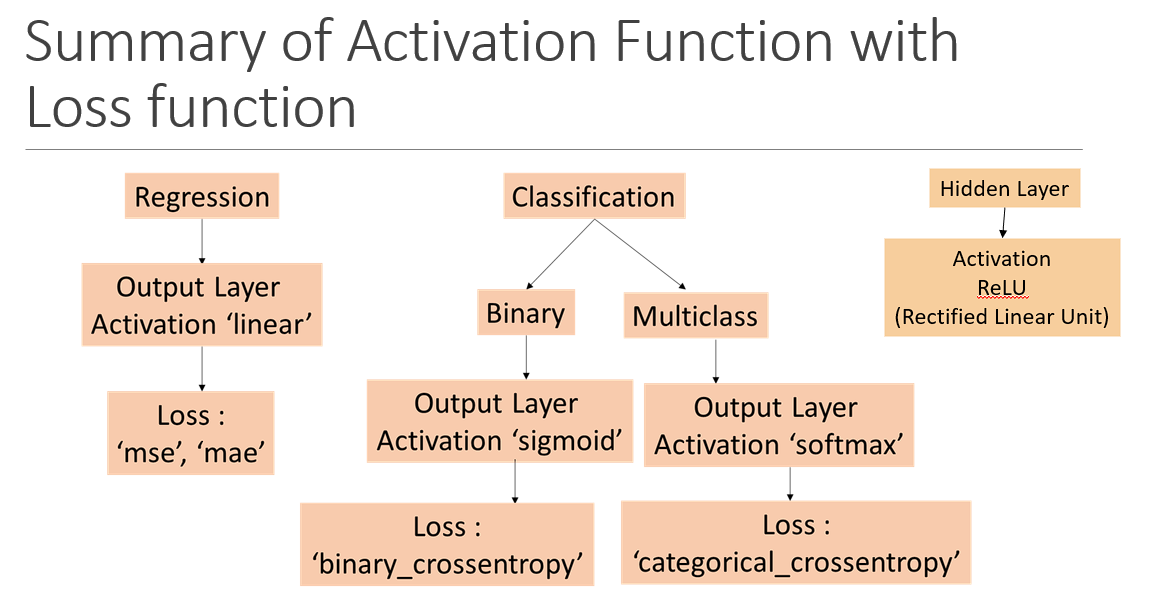

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
# Initalize Sequential model
model = Sequential()

# Hidden Layer 1
model.add(Dense(64, activation='relu', input_dim=xtrain.shape[1]))
# Hidden Layer 2
model.add(Dense(32, activation='relu'))
# Output Layer
model.add(Dense(1, activation='linear'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [27]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Training the neural network

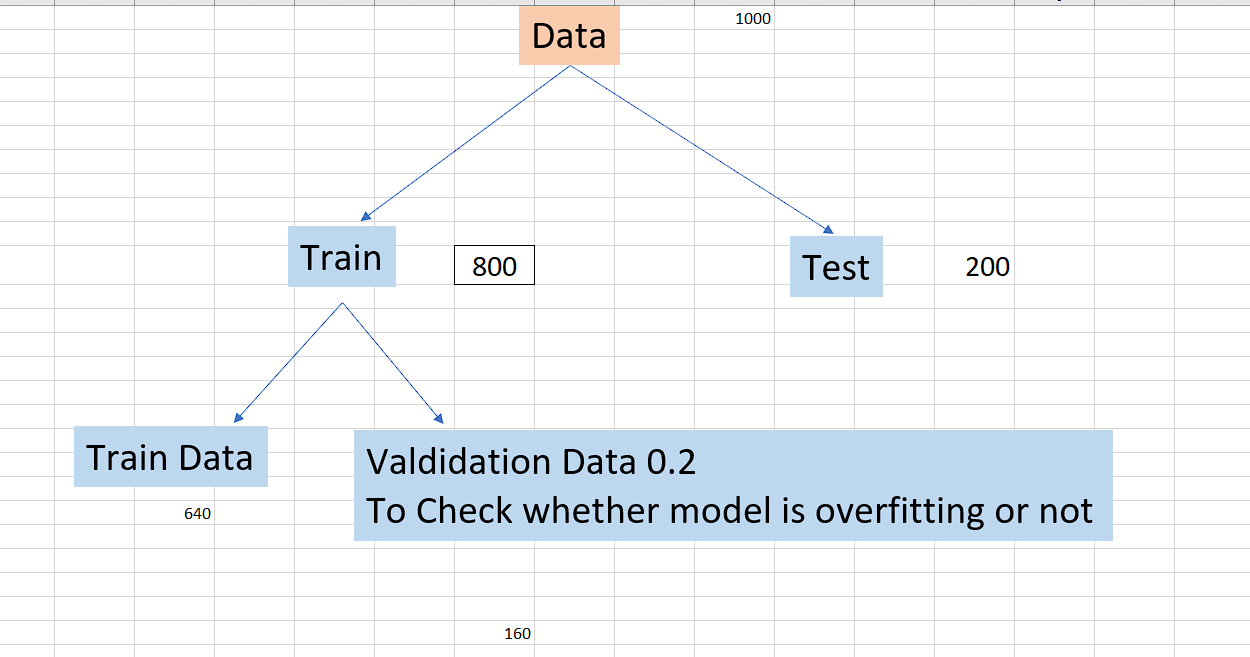

In [28]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


100/100 [==============================] - 1s 3ms/step - loss: 66842.6250 - mae: 207.1838 - val_loss: 67974.7031 - val_mae: 207.8675
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 55783.5156 - mae: 187.6497 - val_loss: 43690.7305 - val_mae: 163.8895
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 24605.1250 - mae: 113.9529 - val_loss: 10062.9922 - val_mae: 68.0423
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 4027.8474 - mae: 38.6848 - val_loss: 1406.0272 - val_mae: 25.5652
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 928.2615 - mae: 22.3258 - val_loss: 730.8923 - val_mae: 19.8667
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 551.8550 - mae: 17.6260 - val_loss: 477.3221 - val_mae: 16.4920
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 421.5207 - mae: 15.7880 - val_loss: 413.0314 - val_mae: 15.5459
Epoch 

In [29]:
hist.history['loss']

[66842.625,
 55783.515625,
 24605.125,
 4027.847412109375,
 928.261474609375,
 551.85498046875,
 421.52069091796875,
 383.8740234375,
 360.08380126953125,
 341.00799560546875,
 321.66339111328125,
 308.3706359863281,
 288.384033203125,
 272.2715759277344,
 257.6607666015625,
 241.06362915039062,
 226.74049377441406,
 214.7392120361328,
 201.12388610839844,
 188.88475036621094,
 176.73870849609375,
 164.9924774169922,
 156.42376708984375,
 148.6898651123047,
 139.89747619628906,
 131.9755401611328,
 125.7081069946289,
 118.92138671875,
 114.41102600097656,
 110.94328308105469,
 105.26575469970703,
 103.4433822631836,
 99.5879898071289,
 96.684814453125,
 95.53299713134766,
 92.47310638427734,
 92.36825561523438,
 90.30880737304688,
 88.791259765625,
 87.36353302001953,
 86.52297973632812,
 84.86690521240234,
 85.0723648071289,
 82.5374526977539,
 82.25931549072266,
 81.40447998046875,
 80.75100708007812,
 80.59253692626953,
 79.55652618408203,
 79.887451171875,
 77.56885528564453,
 77.6

In [30]:
hist.history['val_loss']

[67974.703125,
 43690.73046875,
 10062.9921875,
 1406.0272216796875,
 730.892333984375,
 477.32208251953125,
 413.03143310546875,
 380.0482482910156,
 363.9630432128906,
 340.4324951171875,
 337.0250244140625,
 308.9144592285156,
 302.0506286621094,
 285.3565979003906,
 268.7870788574219,
 253.80369567871094,
 239.87550354003906,
 229.83050537109375,
 220.4496307373047,
 218.8572998046875,
 200.07420349121094,
 190.85076904296875,
 182.2572479248047,
 179.94281005859375,
 169.0249481201172,
 163.68690490722656,
 158.83895874023438,
 156.86465454101562,
 150.66836547851562,
 147.36602783203125,
 143.52670288085938,
 140.92269897460938,
 140.15255737304688,
 142.48382568359375,
 137.19790649414062,
 136.3618621826172,
 135.43125915527344,
 135.14312744140625,
 133.6011505126953,
 130.85572814941406,
 134.22073364257812,
 131.27171325683594,
 130.73345947265625,
 132.49151611328125,
 133.7428741455078,
 130.6703643798828,
 134.633544921875,
 132.47714233398438,
 140.83291625976562,
 132.2

In [31]:
hist.history['mae']

[207.18377685546875,
 187.64968872070312,
 113.95285034179688,
 38.68483352661133,
 22.325796127319336,
 17.625951766967773,
 15.788020133972168,
 15.115367889404297,
 14.749994277954102,
 14.320611953735352,
 13.926103591918945,
 13.570531845092773,
 13.139720916748047,
 12.717765808105469,
 12.424200057983398,
 12.004071235656738,
 11.665827751159668,
 11.293827056884766,
 10.976276397705078,
 10.621698379516602,
 10.292261123657227,
 9.955074310302734,
 9.7171049118042,
 9.4711275100708,
 9.13234806060791,
 8.950106620788574,
 8.772493362426758,
 8.512020111083984,
 8.371814727783203,
 8.267339706420898,
 8.033638000488281,
 7.9990034103393555,
 7.810758590698242,
 7.723857879638672,
 7.685227870941162,
 7.569177150726318,
 7.560860633850098,
 7.478787422180176,
 7.387453556060791,
 7.351874828338623,
 7.340173244476318,
 7.228133678436279,
 7.273455619812012,
 7.156622409820557,
 7.111125946044922,
 7.099236488342285,
 7.080198287963867,
 7.056264877319336,
 6.999139308929443,
 6.9

In [32]:
hist.history['val_mae']

[207.86753845214844,
 163.88951110839844,
 68.0423355102539,
 25.565229415893555,
 19.866655349731445,
 16.49202537536621,
 15.545928001403809,
 15.394035339355469,
 14.833449363708496,
 14.44245719909668,
 14.0449857711792,
 13.686382293701172,
 13.42054557800293,
 13.082297325134277,
 12.762694358825684,
 12.489537239074707,
 12.206766128540039,
 11.943560600280762,
 11.797396659851074,
 11.730586051940918,
 11.253242492675781,
 10.998320579528809,
 10.691076278686523,
 10.652430534362793,
 10.414176940917969,
 10.234840393066406,
 10.095367431640625,
 10.028397560119629,
 9.835088729858398,
 9.733766555786133,
 9.624202728271484,
 9.510357856750488,
 9.470793724060059,
 9.511855125427246,
 9.353782653808594,
 9.369911193847656,
 9.322872161865234,
 9.293841361999512,
 9.251659393310547,
 9.182918548583984,
 9.251808166503906,
 9.210134506225586,
 9.166557312011719,
 9.25181770324707,
 9.236211776733398,
 9.163080215454102,
 9.320079803466797,
 9.174003601074219,
 9.54291820526123,
 

### Plot the learning curve

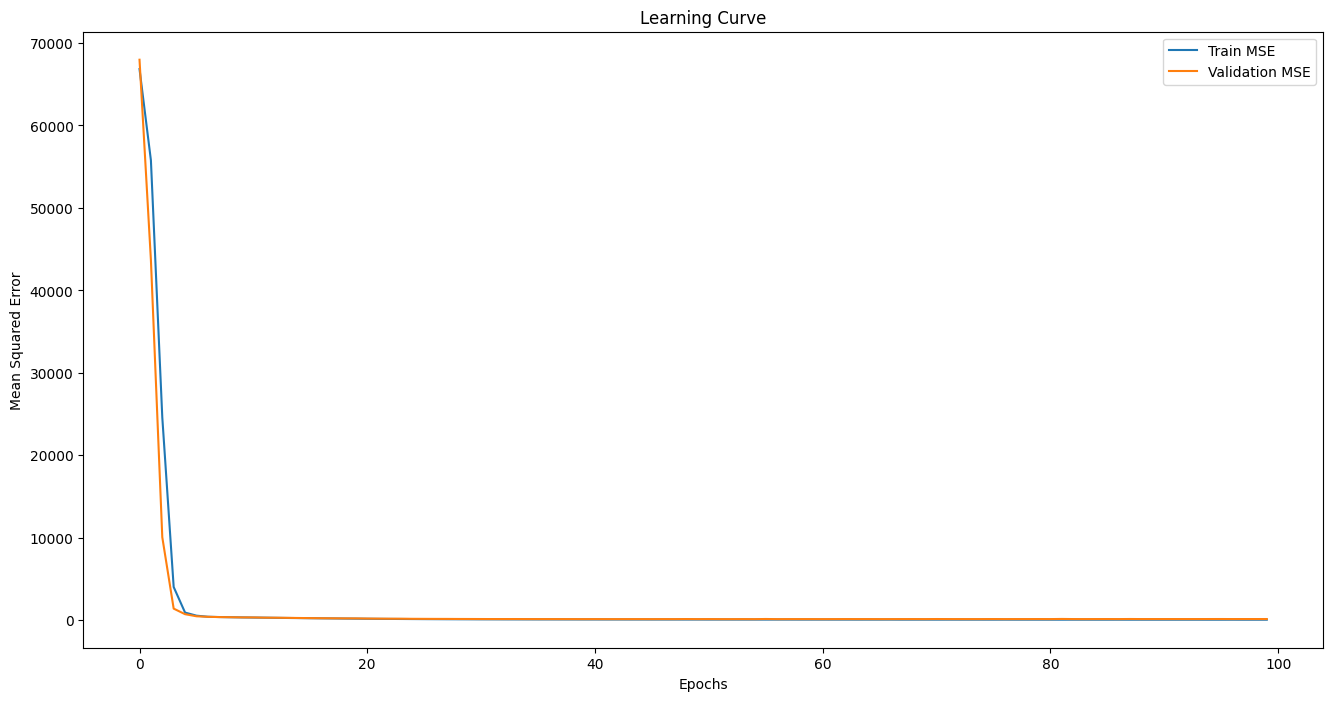

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'], label='Train MSE')
plt.plot(hist.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate the model

In [34]:
model.evaluate(xtrain, ytrain)

125/125 [==============================] - 0s 901us/step - loss: 73.1268 - mae: 6.5922


[73.1268310546875, 6.592174530029297]

In [35]:
model.evaluate(xtest, ytest)

32/32 [==============================] - 0s 945us/step - loss: 125.1137 - mae: 8.8053


[125.1136703491211, 8.805253028869629]

### Predict train and test

In [36]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

32/32 [==============================] - 0s 715us/step


In [37]:
ypred_tr[0:5]

array([[ 420.12405 ],
       [-459.9359  ],
       [  37.352646],
       [ 121.837   ],
       [-216.49219 ]], dtype=float32)

In [38]:
ytrain.head()

,Y
4227,421.295025
4676,-469.452726
800,42.172815
3671,114.083914
4193,-217.535707


In [40]:
ypred_ts[0:5]

array([[ 309.33453 ],
       [ -72.473595],
       [-174.647   ],
       [ 232.11374 ],
       [ 184.3963  ]], dtype=float32)

In [41]:
ytest.head()

,Y
1501,297.782677
2586,-55.418700
2653,-181.896454
1055,210.251382
705,188.412050


### Show r2 score in train and test

In [42]:
from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain, ypred_tr)
print(f'Training R2 : {tr_r2:.4f}')

Training R2 : 0.9989


In [43]:
ts_r2 = r2_score(ytest, ypred_ts)
print(f'Testing R2 : {ts_r2:.4f}')

Testing R2 : 0.9983


### Save the model for future

In [44]:
model.save('ExampleRegression.keras')

### Loading the model

In [45]:
from keras.models import load_model

In [46]:
nn = load_model('ExampleRegression.keras')

In [47]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
